### Problem Statement:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. 

#### Solution Expected - We have to build a classification model to predict whether a transaction is fraudulent or not.

### Business understanding : 

In the current world, lot of new technologies are coming daily. Banking Transaction have evolved a lot from paper works to digital transactions and to card transactions. Due to this the number of transactions has increased multifold and cash transaction and cheque transactions have decreased drastically and huge load is getting piled on the banks server for daily transacations. There are lot of digital font prints left by every customer, at some places these are compromised, as a result confidential information falls into the wrong hands. But the onus of safety and secuirty of customer's money is on the Banks. Due to high volume transactions, its impractical to be manually monitored. Hence the Banks need several models to monitor the transactions and raise alarm when something is wrong. 

One such model requirement is to identify credit cra transaction fraud and raise alarm as quickly as possible. So that no one looses money it can be a customer nor POS vendors nor the Bank. Hence the idea here is creating a model, using the features available of the customer and his transactions, so that model can predict the fraud transactions quicklly in real time and shortlist the transaction for a manual intervention to cross check with card holder immediately.

Since there is monetary value associated with every transaction and missing one fraud transaction shall end up has a loss to the Bank. It is understood that the False Negative is more danagerous than False Positive. Has false Negative will lead to financial losses but false Positive shall lead customer inconvenience. I'm sure later is much better to handle. 
So we need to build a strong model which as high accuracy in identifying a Fraud transaction more accurately. 

# Step 1 - Import Libraries and Load Data Set

In [1]:
# some of the basic libraries to do EDA & Pre-processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(os.getcwd())

C:\Users\hp\Documents\find-default\notebooks


In [3]:
os.chdir(r'C:\Users\hp\Documents\find-default')
print(os.getcwd())

C:\Users\hp\Documents\find-default


# Lets Load the DataSet

In [4]:
file_path = 'data/raw/creditcard.csv'

df = pd.read_csv(file_path)

# STEP 3 - VISUALIZE DATA - EDA

View and Understand the Data

In [5]:
# lets see first 5 records to understand the data glimpse

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Lets check the shape of the data

df.shape

(284807, 31)

In [7]:
# Lets check the dtypes and nullvalues

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### There are no null values in the data. Hence we dont have to handle null values.

In [8]:
df['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [9]:
df['Time'].nunique()

124592

In [10]:
df['Time'].min()

0.0

In [11]:
df['Time'].max()

172792.0

## It looks like the data in the Time column is INT not Float. So lets change the data type.

In [12]:
df['Time']=df['Time'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int32  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
# Lets check the description of the data

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Since the features V1 - V28 data is PCA transformed, we dont have to treat any outliers separeltly from these features. Lets work on non transformed Target Variable, Amount column

# Understand Target Variable

In [15]:
# lets check Target column distribution - class

target_classes=df['Class'].value_counts()
target_classes

Class
0    284315
1       492
Name: count, dtype: int64

In [16]:
# lets check the percentage of each class data in the Target column

non_fraud_trans = (target_classes[0]/df['Class'].count()*100)
print(f"Total percentage of Non Fraud Transactions : {non_fraud_trans}%")

fraud_trans = (target_classes[1]/df['Class'].count()*100)
print(f"Total Percentage of Fraud Transactions : {fraud_trans}%")

Total percentage of Non Fraud Transactions : 99.82725143693798%
Total Percentage of Fraud Transactions : 0.1727485630620034%


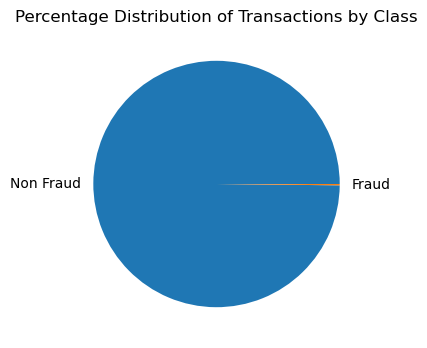

<Figure size 640x480 with 0 Axes>

In [17]:
# Lets see the distribution of Class Labels in Target column

image_path = 'visuals\Class_Dist.png'


plt.figure(figsize=(4,4))
plt.pie([non_fraud_trans,fraud_trans], labels=['Non Fraud', 'Fraud'])
plt.title("Percentage Distribution of Transactions by Class")
plt.show()
plt.savefig(image_path)

In [18]:
df['Amount'].nunique()

32767

In [19]:
# Lets check what is the Total Sum of Transaction in the data and fraud share.

total_trans_value = df['Amount'].sum()
print(f"Total Value of Transactions : {total_trans_value}")

fraud_trans_value = df[df['Class']==1]['Amount'].sum()
print(f"Total Value of Fraud Transaction : {fraud_trans_value}")

non_fraud_trans_value = total_trans_value - fraud_trans_value
print(f"Total Value of Good/Non Fraud Transaction : {non_fraud_trans_value}")

Total Value of Transactions : 25162590.009999998
Total Value of Fraud Transaction : 60127.97
Total Value of Good/Non Fraud Transaction : 25102462.04


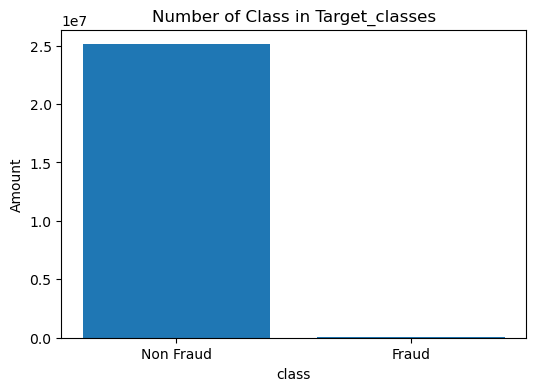

<Figure size 640x480 with 0 Axes>

In [20]:
# Lets see a Bar chart to understand the class feature vs Amount.

import seaborn as sns

image_path = 'visuals\class_Amount.png'

values = [non_fraud_trans_value, fraud_trans_value]
labels = ['Non Fraud','Fraud']

plt.figure(figsize=(6,4))
plt.bar(labels,values)
plt.title('Number of Class in Target_classes')
plt.xlabel('class')
plt.ylabel('Amount')
plt.show()
plt.savefig(image_path)

# Lets check the distribution of Fraud & Non Fraud Transaction over Time

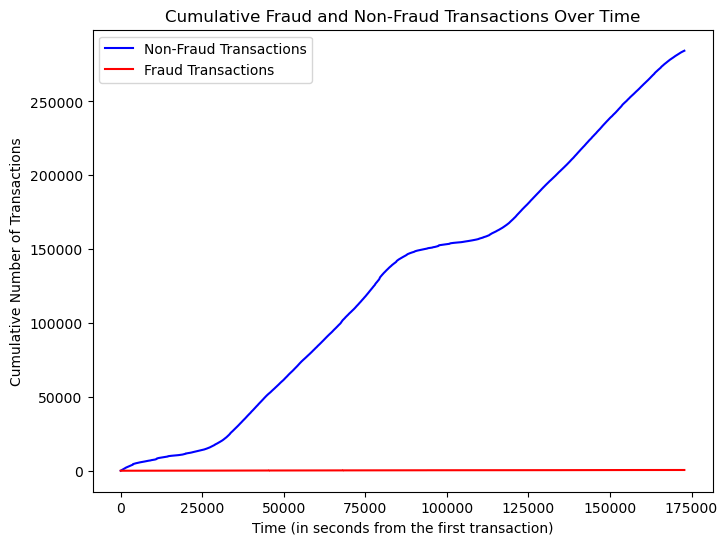

<Figure size 640x480 with 0 Axes>

In [21]:
# Sorting the dataframe by time 
df = df.sort_values(by='Time')

# Create cumulative sum columns for fraud and non-fraud transactions
df['Fraud_CumSum'] = df['Class'].cumsum()
df['NonFraud_CumSum'] = (1 - df['Class']).cumsum()

# Plotting

image_path = 'visuals\Class_Time_dist.png'
plt.figure(figsize=(8, 6))

plt.plot(df['Time'], df['NonFraud_CumSum'], label='Non-Fraud Transactions', color='blue')
plt.plot(df['Time'], df['Fraud_CumSum'], label='Fraud Transactions', color='red')

plt.title('Cumulative Fraud and Non-Fraud Transactions Over Time')
plt.xlabel('Time (in seconds from the first transaction)')
plt.ylabel('Cumulative Number of Transactions')
plt.legend()
plt.show()
plt.savefig(image_path)

### we see most of FRAUD transactions are around low transaction value. And their is no pattern with time.  So we can 

#### Lets check the correlation among the independent & target features

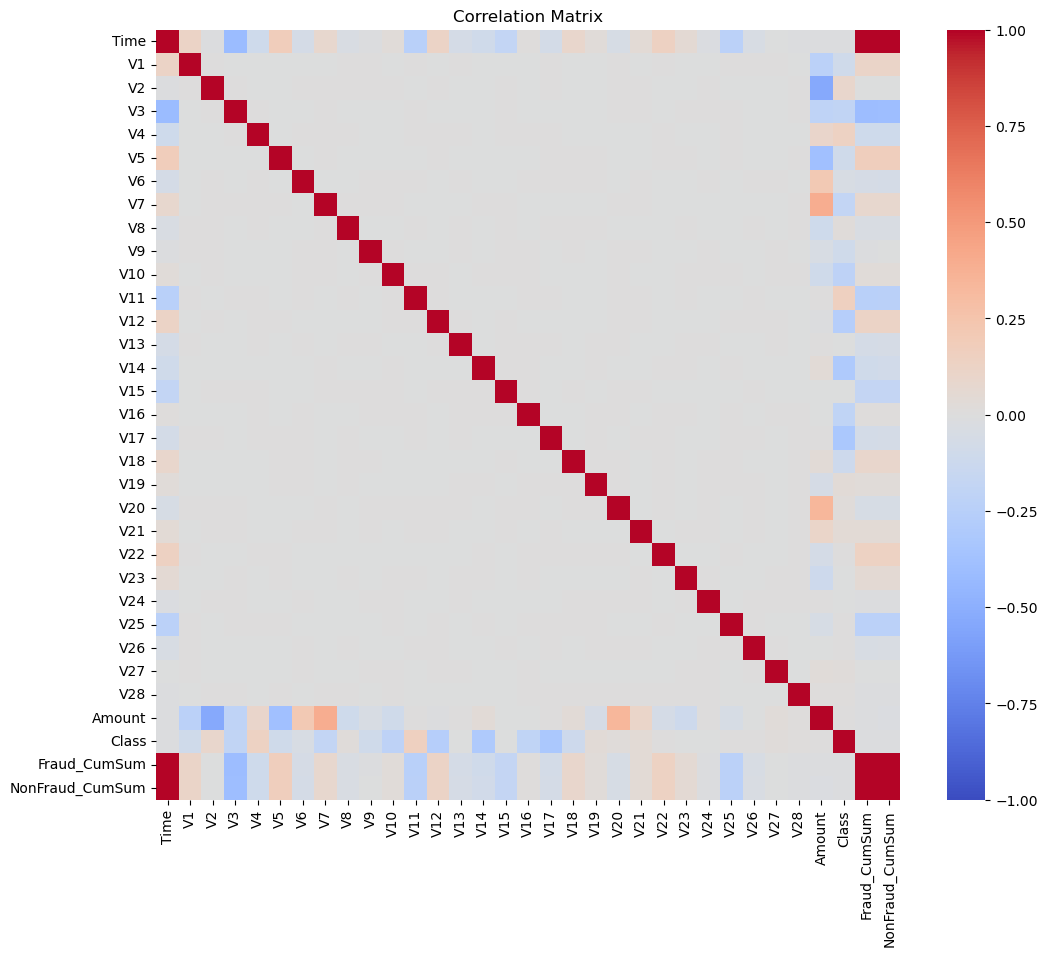

<Figure size 640x480 with 0 Axes>

In [22]:
# Calculate correlation matrix
corr_matrix = df.corr()

image_path = 'visuals\corr_matrix.png'

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
plt.savefig(image_path)

In [23]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Fraud_CumSum', 'NonFraud_CumSum'],
      dtype='object')

### 'Fraud_CumSum' and 'NonFraud_Cumsum' columns are used for EDA to understand time and amount. to be dropped to avoid complex issues in deployment or test data prep

In [24]:
# 'Fraud_CumSum' and 'NonFraud_Cumsum' columns are used for EDA to understand time and amount. to be dropped to avoid complex issues in deployment or test data prep

columns_to_drop_presplit = ['Fraud_CumSum','NonFraud_CumSum']
df = df.drop(columns_to_drop_presplit, axis=1)

# SPLIT DATA - TRAIN and Test Data

In [25]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)


In [26]:
X_train.columns, X_test.columns

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
       dtype='object'),
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
       dtype='object'))

# ENCODING

We have done a detailed EDA & pre-processed the data. It's clear that all features except for Time, Amount and Class are already PCA Transformed. Lets encode the left out 3 columns to make them uniform. 

1. Lets encode the Time column with OrinalEncoder since the data in the column has some order.
2. Amountcolumn is a continious data lets transform it after splitting to avoid data leakage to model. 
3. Class column has binary values, hence no need to encode or transform 

In [27]:
from sklearn.preprocessing import OrdinalEncoder
import joblib

# Reshape the Time data for encoding
time_encoder = OrdinalEncoder()
time_encoded = time_encoder.fit_transform(X_train[['Time']])
X_train['Time_Encoded'] = time_encoded
X_train.drop('Time', axis=1, inplace=True) # drop duplicate column

# Save the encoder
# joblib.dump(time_encoder, 'models/time_encoder.joblib')


### Time column is encoded and new column created, so duplicate columns dropped.

In [28]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Time_Encoded'],
      dtype='object')

In [29]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Scale the Data

In [30]:
print(os.getcwd())

C:\Users\hp\Documents\find-default


In [31]:
# Fitting and saving the scaler on Amount column as rest are taken care in original form by PCA

from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train['Amount_Scaled'] = scaler.fit_transform(X_train[['Amount']])

scaler_path = os.path.join('models', 'amount_scaler.joblib')
joblib.dump(scaler, scaler_path)

['models\\amount_scaler.joblib']

In [32]:
X_train.shape, y_test.shape

((227845, 31), (56962,))

# Check Distribution of features & decide transformation

1. Time is categorical and its already encoded using Oridnal Encoding. we dont need to transform as most models uses it comfortably.
2. Features V1 - V28 are already transformed using PCA. Its understand that values are mean centric and has a normal or scaled variance, we dont have to transform these features too.
3. Target variable Class column is having binary values and it need not be transformed or checked for distribution.
4. Amount column is scaled now. Lets check its distribution using a Histogram and based on skewness lets transform if reqd.

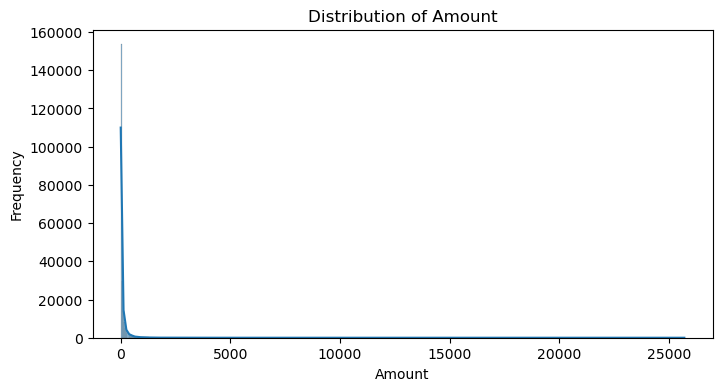

<Figure size 640x480 with 0 Axes>

In [33]:
# Lets Plot a histogram and density plot for 'Amount' column

image_path = 'visuals\Amount_hist.png'

plt.figure(figsize=(8,4))
sns.histplot(X_train['Amount'], kde=True, bins=500)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
plt.savefig(image_path)

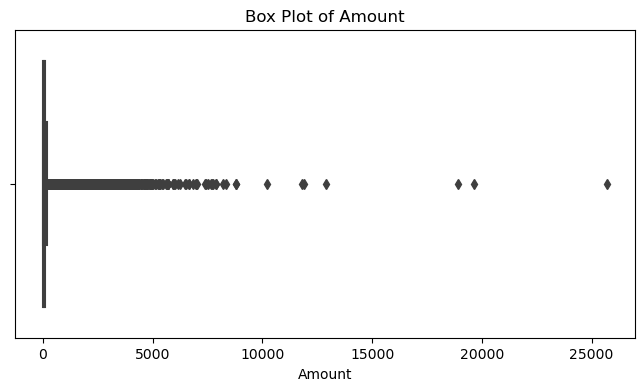

In [34]:
image_path = 'visuals\Amount_boxplot.png'

plt.figure(figsize=(8,4))
sns.boxplot(x=X_train['Amount'])
plt.title('Box Plot of Amount')
plt.xlabel('Amount')
plt.savefig(image_path)
plt.show()

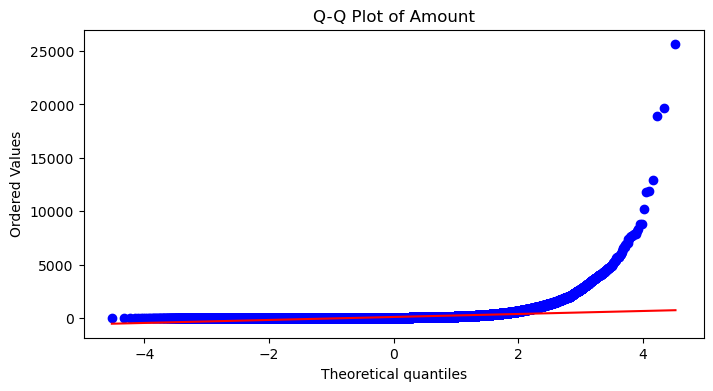

In [35]:
import scipy.stats as stats
# Q-Q plot

image_path = 'visuals\Amount_QQplot.png'

plt.figure(figsize=(8,4))
stats.probplot(X_train['Amount'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Amount')
plt.savefig(image_path)
plt.show()

In [36]:
from scipy.stats import skew

# Calculate skewness for the 'Amount' column in the training data
amount_skewness = skew(X_train['Amount'])
print(f'Skewness of the Amount column: {amount_skewness:.4f}')

Skewness of the Amount column: 18.2620


In [37]:
from scipy.stats import skew

# Calculate skewness for all features in the training data
skewness_values = X_train.apply(skew).sort_values(ascending=False)

# Display the skewness of each feature
print(skewness_values)

Amount_Scaled    18.261982
Amount           18.261982
V28              11.989864
V7                3.672991
V21               3.342968
V6                1.942714
V10               1.177451
V4                0.683089
V26               0.581594
V9                0.535378
V11               0.358822
V19               0.103452
V13               0.064665
V27               0.034507
Time_Encoded     -0.008921
V22              -0.220980
V18              -0.264475
V15              -0.309839
V25              -0.416077
V24              -0.552639
V16              -1.104824
V14              -1.988960
V20              -2.016036
V3               -2.244973
V12              -2.282060
V5               -2.839581
V1               -3.370406
V17              -3.920443
V2               -5.020655
V23              -5.960689
V8               -8.638000
dtype: float64


### It's clearly visible with Histogram that Amount column is Right or positive Skewed. Some of the observations

1. Since the Amount column in the Credit card is a value of a transaction. It cannot be negatively skewed. 
2. Amount Column - We have checked Histogram, since its too clear, plotted a Box Plot, it clearly shows Positively skewed data.
3. As its aware that V1-V28 are PCA transformed and skewness check of features show Amount column has high skewness of 18% lets transoform the same using BOX COX TRANSFORATION.
4. Its also observed PCA transformed data V28, V7 and V21 is positively skewed but since its PCA transformed i'm NOT Transforming it as it could distort the principal component's nature. 



# Transformation - Box_Cox Transformation
#### Amount column feature is positively skewed lets transform it. (This data has no negative value so it's good to go)

In [38]:
from scipy import stats

X_train['Amount_BoxCox'], lambda_value = stats.boxcox(X_train['Amount'] + 1) # adding 1 as some values have zero
print(f"Lambda value used for Box-Cox transformation: {lambda_value}")

Lambda value used for Box-Cox transformation: -0.04497254555023551


In [39]:
print(X_train[['Amount', 'Amount_BoxCox']].head())

        Amount  Amount_BoxCox
223361    9.99       2.272310
165061   45.90       3.533462
238186   11.99       2.421855
150562  117.44       4.296631
138455    4.49       1.639352


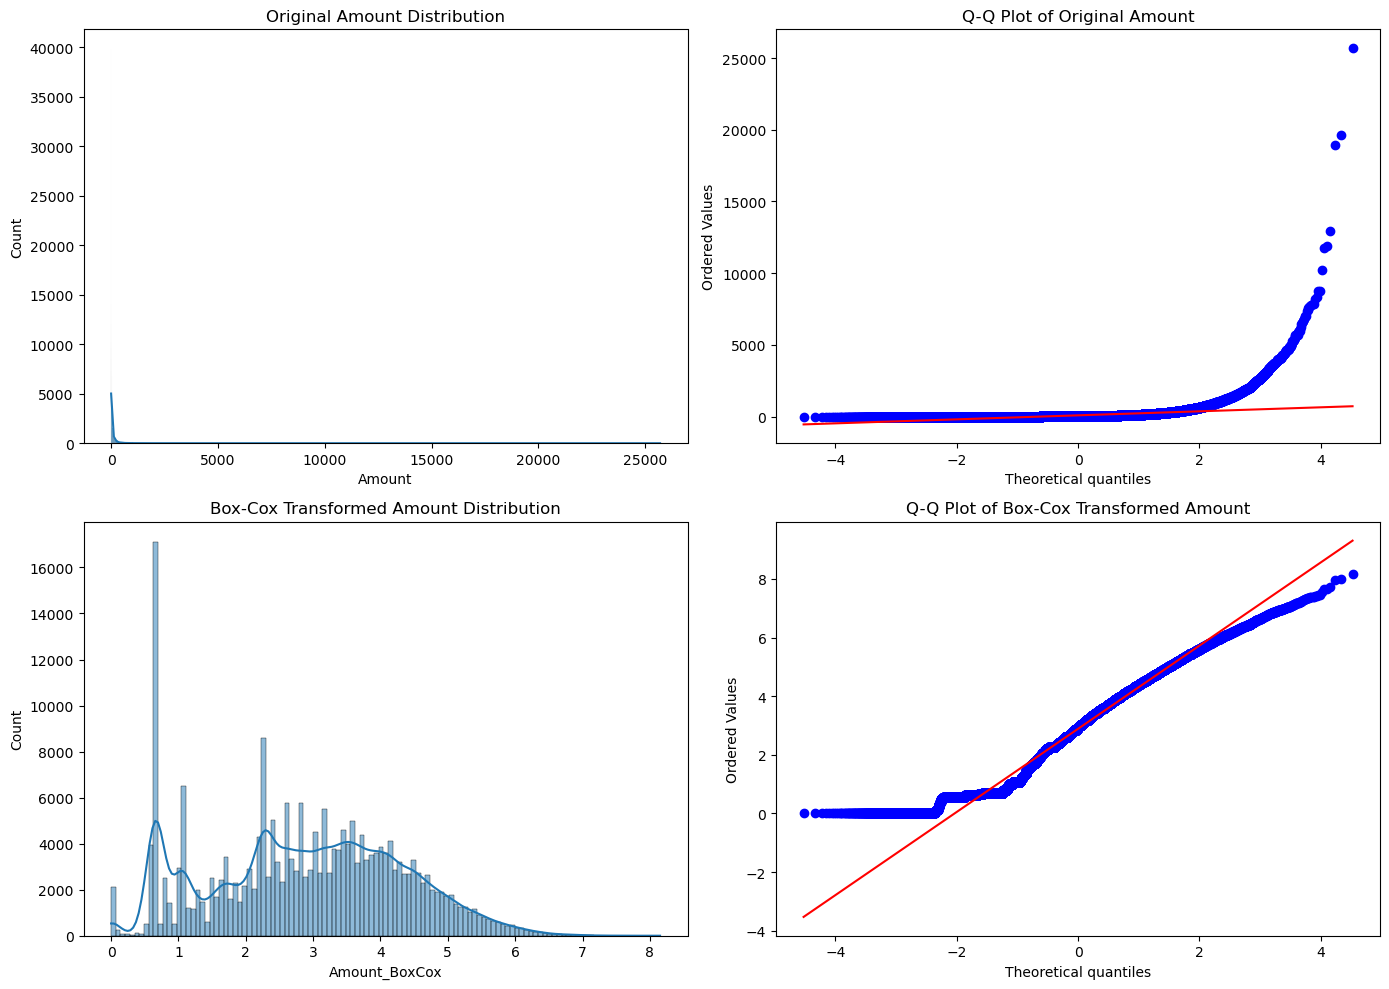

In [40]:
# Lets check the distribution of transformed Amount column & Amount_BoxCox

# Histogram and Q-Q plot for the original 'Amount' column

image_path1 = 'visuals\Amount_b4_box_cox_hist.png'
image_path2 = 'visuals\Amount_b4_box_cox_QQPlot.png'
image_path3 = 'visuals\Amount_aft_box_cox_hist.png'
image_path4 = 'visuals\Amount_aft_box_cox_QQplot.png'

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original Amount
sns.histplot(X_train['Amount'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Amount Distribution')
plt.savefig(image_path1)

# Q-Q plot for original Amount
stats.probplot(X_train['Amount'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Original Amount')
plt.savefig(image_path2)

# Box-Cox Transformed Amount
sns.histplot(X_train['Amount_BoxCox'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Box-Cox Transformed Amount Distribution')
plt.savefig(image_path3)

# Q-Q plot for Box-Cox Transformed Amount
stats.probplot(X_train['Amount_BoxCox'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Box-Cox Transformed Amount')
plt.savefig(image_path4)

plt.tight_layout()
plt.show()


Above histogram plot clearly show that the transformation is effective and its looks more symmetric. Let's understand the columns in the split data and proceed for training models.

In [41]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Time_Encoded', 'Amount_Scaled', 'Amount_BoxCox'],
      dtype='object')

In [42]:
X_test.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [43]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Observation :

1. X_train include Amount, Amount_Scaled, Amount_BoxCox. Lets retain Amount_Box and drop other Amount & Amount_Scaled

Since the V1-V28 is PCA transformed and retaining Amount_BoxCox is wise to have consistency across all features. Also to avoid duplication we should drop Amount and Amount_Scaled

### Since Its seen that Amount_Scaled is not part of X_test. We need to scale the X_test and transform it before proceeding to train models.

In [44]:
# Lets drop the Original Amount column from DF and X_train, X_test and replace with Amount_BoxCox.

# drop Amount Column from df
# df = df.drop(columns=['Amount']))

# Drop Amount column and Create new column Amount_BoxCox based on row indices of X_train
X_train = X_train.drop(columns=['Amount','Amount_Scaled'])
# X_train['Amount_BoxCox'] = df.loc[X_train.index, 'Amount_BoxCox']

In [45]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time_Encoded',
       'Amount_BoxCox'],
      dtype='object')

In [46]:
X_test.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

# Test Data - Scaling and Transforming 

### Setup Function to preprocess Test Data or New Data

In [47]:
import pandas as pd
import joblib
import numpy as np
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

def preprocess_data(data, is_dataframe=False):
    if not is_dataframe:
        # Load the data from CSV
        data_frame = pd.read_csv(data)
    else:
        # Assume data is already a DataFrame
        data_frame = data.copy()
    
    # Cast 'Time' to integer
    data_frame['Time'] = data_frame['Time'].astype(int)
    
    # Reshape and encode the 'Time' feature
    time_encoded = OrdinalEncoder().fit_transform(data_frame[['Time']])
    data_frame['Time_Encoded'] = time_encoded
    
    # Drop the original 'Time' column
    data_frame = data_frame.drop(columns=['Time'])
    
    # Load the scaler
    scaler = joblib.load('models/amount_scaler.joblib')
    
    # Scale the 'Amount' column and apply Box-Cox transformation
    data_frame['Amount_Scaled'] = scaler.transform(data_frame[['Amount']])
    
    # Apply Box-Cox transformation to the 'Amount' column with the given lambda value
    boxcox_lambda = -0.04497254555023551
    data_frame['Amount_BoxCox'] = stats.boxcox(data_frame['Amount'] + 1, lmbda=boxcox_lambda)
    
    # Drop the 'Amount' and 'Amount_Scaled' columns
    data_frame = data_frame.drop(columns=['Amount', 'Amount_Scaled'])
    
    return data_frame

## Input X_test data into the Pipeline Function to prepare the Data ready for Testing

In [48]:
X_test = preprocess_data(X_test, is_dataframe=True)

In [49]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time_Encoded',
       'Amount_BoxCox'],
      dtype='object')

In [50]:
X_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time_Encoded',
       'Amount_BoxCox'],
      dtype='object')

### Now the data is more consistent. Now lets prepare undersampling object and oversampling object.

# Undersampling Data

In [51]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply RandomUnderSampler to training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Print original and resampled training data shapes
print(f"Original training data shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled training data shape: {X_train_resampled.shape}, {y_train_resampled.shape}")

Original training data shape: (227845, 30), (227845,)
Resampled training data shape: (806, 30), (806,)


# Oversampling - SMOTE

In [52]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print original and SMOTE-resampled training data shapes
print(f"Original training data shape: {X_train.shape}, {y_train.shape}")
print(f"SMOTE-resampled training data shape: {X_train_smote.shape}, {y_train_smote.shape}")

Original training data shape: (227845, 30), (227845,)
SMOTE-resampled training data shape: (454884, 30), (454884,)


# Lets save the processed data and save objects to train the model.

# SAVE THE PROCESSED DATA

Lets save the processed data to the processed data folder for easy reference in the future.

In [53]:
# save the processed file

file_path = 'data\processed-data\eda_preprocessed_data.csv'
df.to_csv(file_path)

## SAVE OBJECTS OF THIS NOTEBOOK FOR REFERENCE IN NEXT NOTE BOOK 
                                       model-training-evaluation

In [55]:
import joblib

joblib.dump(X_train, 'data/processed-data/X_train_v1.joblib')
joblib.dump(y_train, 'data/processed-data/y_train_v1.joblib')
joblib.dump(X_test, 'data/processed-data/X_test_v1.joblib')
joblib.dump(y_test, 'data/processed-data/y_test_v1.joblib')
joblib.dump(scaler, 'models/amount_scaler.joblib')
joblib.dump(X_train_resampled, 'data/processed-data/X_train_resampled_v1.joblib')
joblib.dump(y_train_resampled, 'data/processed-data/y_train_resampled_v1.joblib')
joblib.dump(X_train_smote, 'data/processed-data/X_train_smote_v1.joblib')
joblib.dump(y_train_smote, 'data/processed-data/y_train_smote_v1.joblib')

['data/processed-data/y_train_smote_v1.joblib']

In [ ]:
joblib.dump(X_train_smote, 'data/processed-data/X_train_smote_v1.joblib')

In [ ]:
import joblib

joblib.dump(scaler, 'models/amount_scaler.joblib')

In [56]:
import streamlit
print(streamlit.__file__)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\streamlit\__init__.py
